# Authoring AWS Lambda Functions
In this lesson, you will learn the best practices for writing Lambda function code. You will also explore building functions based on the nature of your application and your development tool set. Begin by looking at the programming model and how it applies across the available programming languages. With Lambda, you can use the programming language and integrated development environment (IDE) that you are most familiar with.

Review the programming model and how it applies across the available programming languages.

## AWS Lambda programming model: Use your own code

With Lambda, you can use your own code. You can use the programming language and IDE that you are most familiar with and use the code that you've already written. The code might need some minor adjustments to make it serverless. However, you do not need to redo the bulk of the work to fit Lambda's programming model. Lambda supports the following languages:
### Supported Languages
- Node.js
- Python
- Java
- Go
- C#
- Ruby
- PowerShell


## Start with the handler method

The Lambda function handler is the method in your function code that processes events. When your function is invoked, Lambda runs the handler method. When the handler exits or returns a response, it becomes available to handle another event. The handler method takes two objects – the event object and the context object. 

### Event Object
- The event object is required.
- When your Lambda function is invoked in one of the supported languages, one of the parameters provided to your handler function is an event object. 
- The event object differs in structure and contents, depending on which event source created it. 
- The contents of the event parameter include all of the data and metadata your Lambda function needs to drive its logic.
    - For example, an event created by Amazon API Gateway will contain details related to the HTTPS request that was made by the API client (for example, path, query string, request body). An event created by Amazon S3 when a new object is created will include details about the bucket and the new object.
    
### (Optional) Context Object
- The context object allows your function code to interact with the Lambda execution environment.
- The contents and structure of the context object vary, based on the language runtime your Lambda function is using. At minimum it contains the elements:
    - AWS RequestID – Used to track specific invocations.
    - Runtime – The amount of time in milliseconds remaining before a function timeout.
    - Logging – Information about which Amazon CloudWatch Logs stream your log statements will be sent.

## **Design best practices**

When designing and writing Lambda functions, regardless of the runtime you’re using, it is best practice to separate the business logic (the part of the code the defines the real-world business need) from the handler method. This makes your code more portable and you can target unit-tests at the code without worrying about the configuration of the function. 

It is also a best practice to make your functions modular. For example, instead of having one function that does compression, thumb-nailing, and indexing, consider having three different functions that each serve a single purpose. 

Because your functions only exist when there is work to be done, it is particularly important for serverless applications to treat each function as stateless. That is, no information about state should be saved within the context of the function itself. 

Expand each of the following topics by selecting the (+) for more details on design best practices.

### **Separate business logic**

Separate your core business logic from the handler event.
This makes your code more portable and you can target unit-tests on your code without worrying about the configuration of the function.
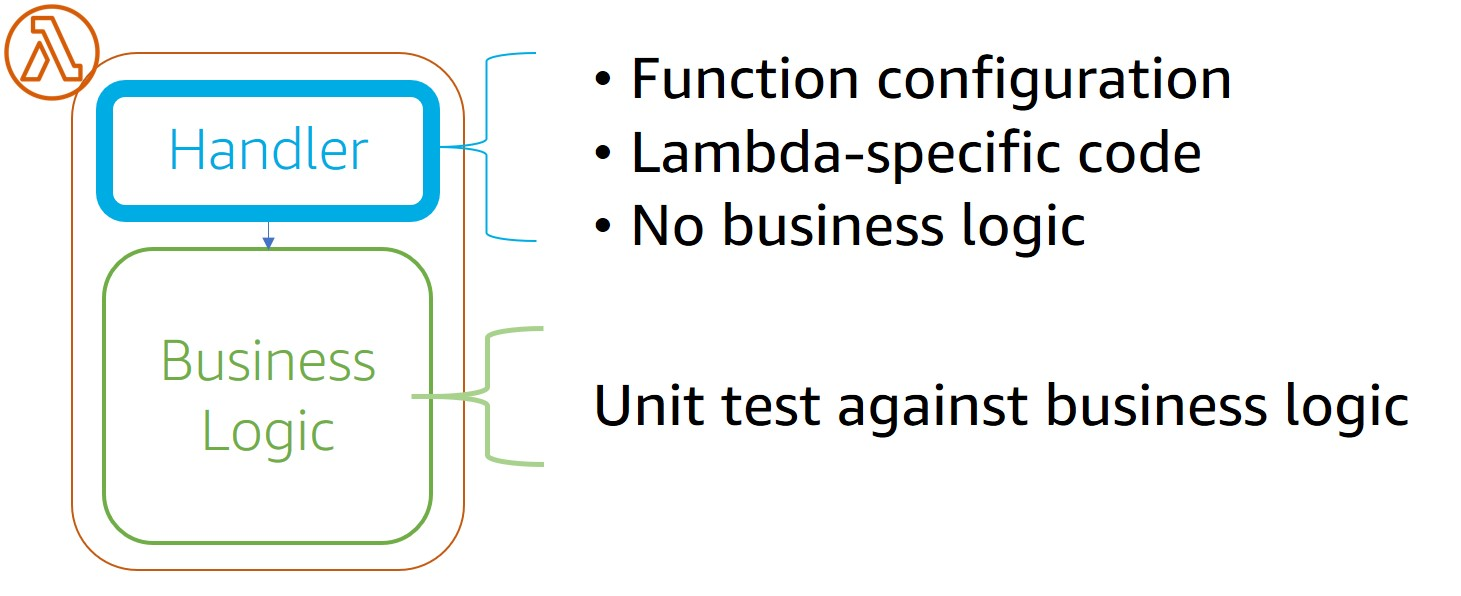

### **Write modular functions**
Module functions will reduce the amount of time that it takes for your deployment package to be downloaded and unpacked before invocation. Instead of having one function that does compression, thumb-nailing, and indexing, consider having three different functions that each serve a single purpose.

Follow the same principles you would apply to developing microservices.
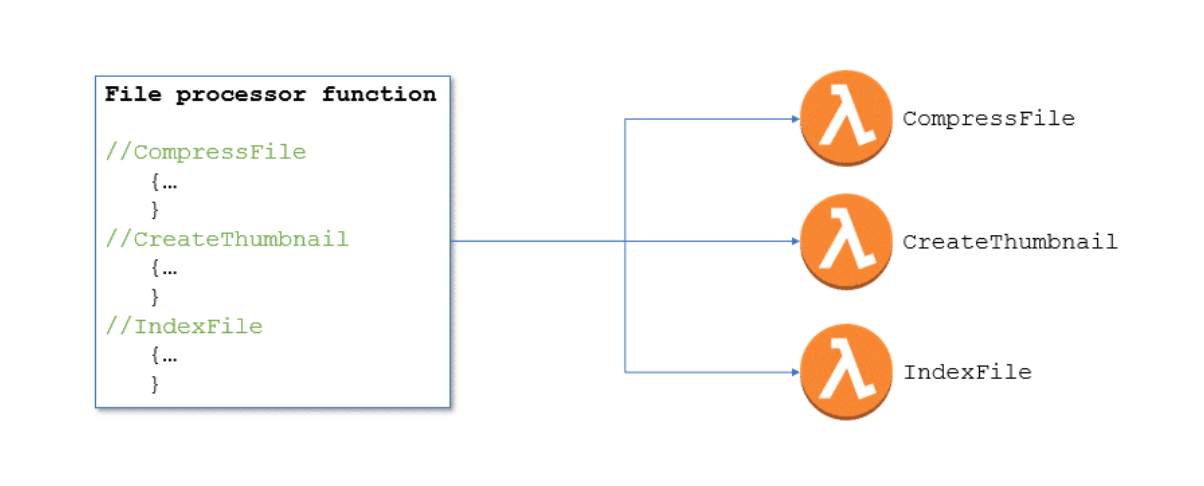

### **Treat functions as stateless**
No information about state should be saved within the context of the function itself.

Because your functions only exist when there is work to be done, it is particularly important for serverless applications to treat each function as stateless. Consider one of the following options for storing state data:

- **Amazon DynamoDB** is serverless and scales horizontally to handle your Lambda invocations. It also has single-millisecond latency, which makes it a great choice for storing state information. 
- **Amazon ElastiCache** may be less expensive than DynamoDB if you have to put your Lambda function in a VPC. 
- **Amazon S3** can be used as an inexpensive way to store state data if throughput is not critical and the type of state data you are saving will not change rapidly.

### Only include what you need

Minimize both your deployment package dependencies and its size.
This can have a significant impact on the startup time for your function. For example, only choose the modules that you need — do not include an entire AWS SDK.

When using TypeScript, you can consider bundling and tree shaking your dependencies.

In Java, opt for simpler dependency injection (inversion of control [IoC]) frameworks. For example, choose Dagger or Guice over more complex ones such as Spring Framework.

Reduce the time it takes Lambda to unpack deployment packages authored in Java. 
Put your dependency .jar files in a separate /lib directory.

## Best practices for writing code

When it comes to writing code, there are a few practices that are important to follow. Expand each of the following topics by selecting the (+) to learn about the recommended best practices.

**Include logging statements**

Lambda functions can and should include logging statements, which are written to CloudWatch.

Implement structured logging throughout your applications. Most runtimes provide libraries to help use structured logging. See Lambda Powertools Python Homepage(opens in a new tab) for Python examples, or Lambda Powertools Java Homepage(opens in a new tab) for Java examples. 

Here's an example of logging using the logger function in Python.

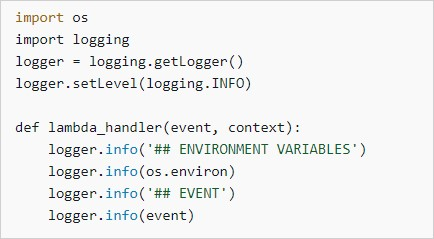

**Use return coding**
Functions must give Lambda information about the results of their actions.



Use the return coding appropriate for your selected programming language to exit your code. For languages such as Node.js, Lambda provides additional methods on the context object for callbacks. You use these context-object methods to tell Lambda to terminate your function and optionally return values to the caller.

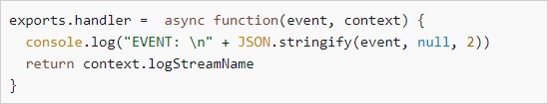

**Provide environment variables**
Take advantage of environment variables for operational parameters.

You can use these parameters to pass updated configuration settings without changes to the code itself. You create an environment variable on your function by defining a key and a value. Your function uses the name of the key to retrieve the value of environment variable.



You can also use environment variables to store sensitive information required by the function.

Lambda encrypts the environment variables with a key that it creates in your account (an AWS managed customer master key [CMK]). Use of this key is free. You can also choose to provide your own key for Lambda to use instead of the default key. Customer managed CMKs incur standard AWS Key Management Service (AWS KMS) charges.



The following topic covers additional ways to add secrets and reference data to your code.

**Add secret and reference data**
AWS Secrets Manager helps you organize and manage important configuration data such as credentials, passwords, and license keys.



Parameter Store, a capability of AWS Systems Manager, is integrated with Secrets Manager so you can retrieve Secrets Manager secrets when using AWS Lambda. By using Parameter Store to reference Secrets Manager secrets, you create a consistent and secure process for calling and using secrets and reference data in your code and configuration scripts. Parameter Store also integrates with AWS Identity and Access Management (IAM), giving you fine-grained access control to individual parameters or branches of a hierarchical tree.



Additionally, you can use AWS AppConfig to source, validate, deploy, and monitor configurations stored in Parameter Store, System Manager Document Store, Amazon S3, and more.

**Avoid recursive code**

Avoid a situation in which a function calls itself.

Recursive code could lead to uncontrolled scaling of invocations that would make you lose control of your concurrency. 



***IMPORTANT*** If you accidentally deploy recursive code, you can quickly set the concurrent execution limit to zero by using the console or command line to immediately throttle requests while you fix the code.

**Gather metrics with Amazon CloudWatch**
The CloudWatch embedded metric format (EMF) is a JSON specification used to instruct CloudWatch Logs to automatically extract metric values embedded in structured log events. You can use CloudWatch to graph and create alarms on the extracted metric values. 



You can use EMF to ingest complex high-cardinality application data in the form of logs and easily generate actionable metrics from them. Traditionally, it has been hard to generate actionable custom metrics from your ephemeral resources such as Lambda functions and containers.

**Reuse execution context**
Take advantage of an existing execution context when you get a warm start by doing the following:

1. Store dependencies locally.

2. Limit re-initialization of variables.

3. Reuse existing connections.

4. Use tmp space as transient cache.

5. Check that background processes have completed.

## Example: Lambda function

The following example is a simple function written in Node.js, invoked by Amazon S3.

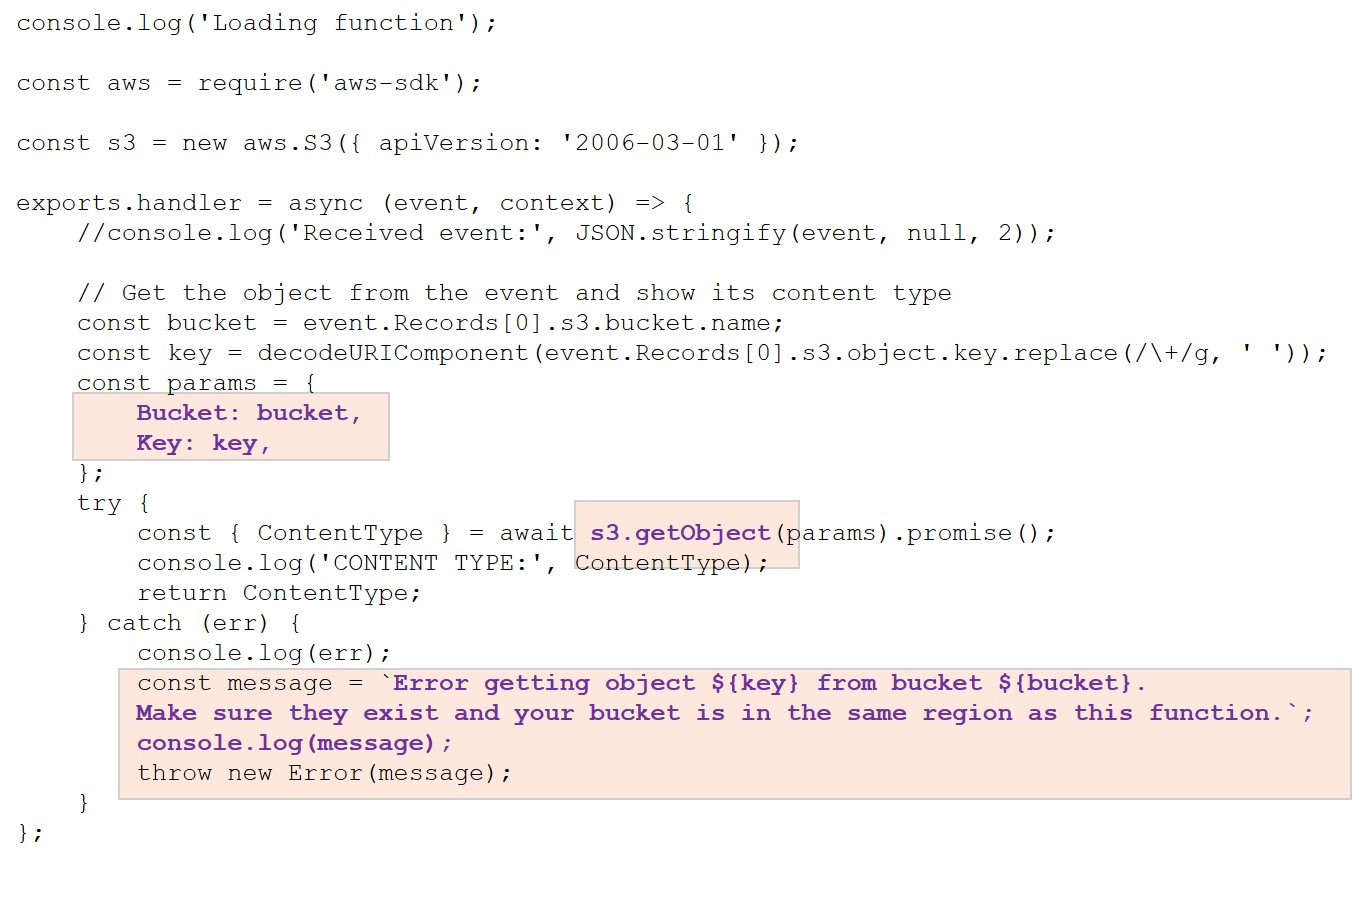



## Building Lambda functions

There are three ways to build and deploy your Lambda functions – the Lambda console editor, deployment packages, and automation tools. Take a look at each of these methods in more detail.

### Lambda console editor

You can author functions within the Lambda console, with an IDE toolkit, using command line tools, or using the AWS SDKs. If you are new to Lamdba, building functions in the console is the best place to begin writing your functions. If your code does not require custom libraries (other than the AWS SDK), you can edit your code inline through the console. The Lambda console editor is based on the AWS Cloud9 IDE where you can author and test code directly. When working with Lambda via the console, note that when you save your Lambda function the Lambda service creates a deployment package that it can run. Once this deployment package is created, your function is deployed to the AWS Cloud. Because of this, you should build your functions using an account that is suitable for testing, and disable any selected triggers until your code testing is completed.

The following shows a screen capture of the Lambda console Create function window. From this window, you have four options for how to create your function. The choices are: Author from scratch, Use a blueprint, Container image, or Browse serverless app repository. (Select the image to magnify it).

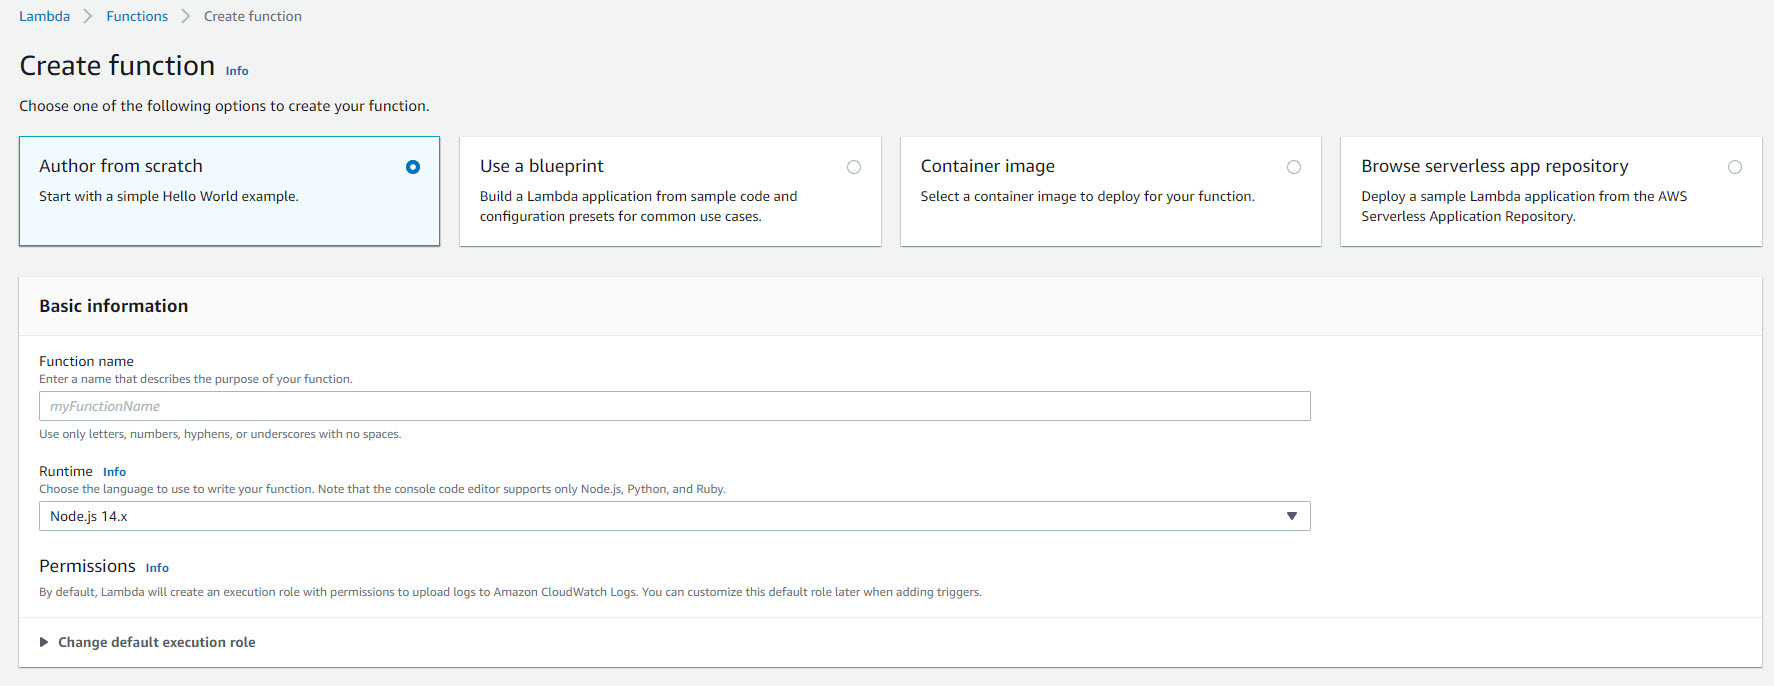

### Deployment packages

Your Lambda function's code consists of scripts or compiled programs and their dependencies. As developers increase their skills and advance beyond using the AWS Lambda console, they start using deployment packages to deploy the function code. Lambda supports two types of deployment packages – container images and .zip file archives. You can create and upload a .zip file to S3 or use a container image and push to Amazon Elastic Container Registry (Amazon ECR).

### Automate using tools

Serverless applications built using Lambda are a combination of Lambda functions, event sources, and other resources defined using the AWS Serverless Application Model (AWS SAM). You can automate the deployment process of your applications by using AWS SAM and other AWS services, such as AWS CodeBuild, AWS CodeDeploy, and AWS CodePipeline.

## What is AWS SAM?

AWS SAM is an open-source framework for building serverless applications. It provides shorthand syntax to express functions, APIs, databases, and event source mappings. With just a few lines per resource, you can define the application you want and model it using YAML. You provide AWS SAM with simplified instructions for your environment and during deployment AWS SAM transforms and expands the AWS SAM syntax into AWS CloudFormation syntax (a fully detailed CloudFormation template). All CloudFormation options are still available within AWS SAM. AWS SAM just makes it easier to set up the resources commonly needed for serverless applications. 

A variety of serverless frameworks are available. Find a framework that works with your developer tool chain and minimizes the work of your execution environment. This course uses AWS SAM for serverless examples.

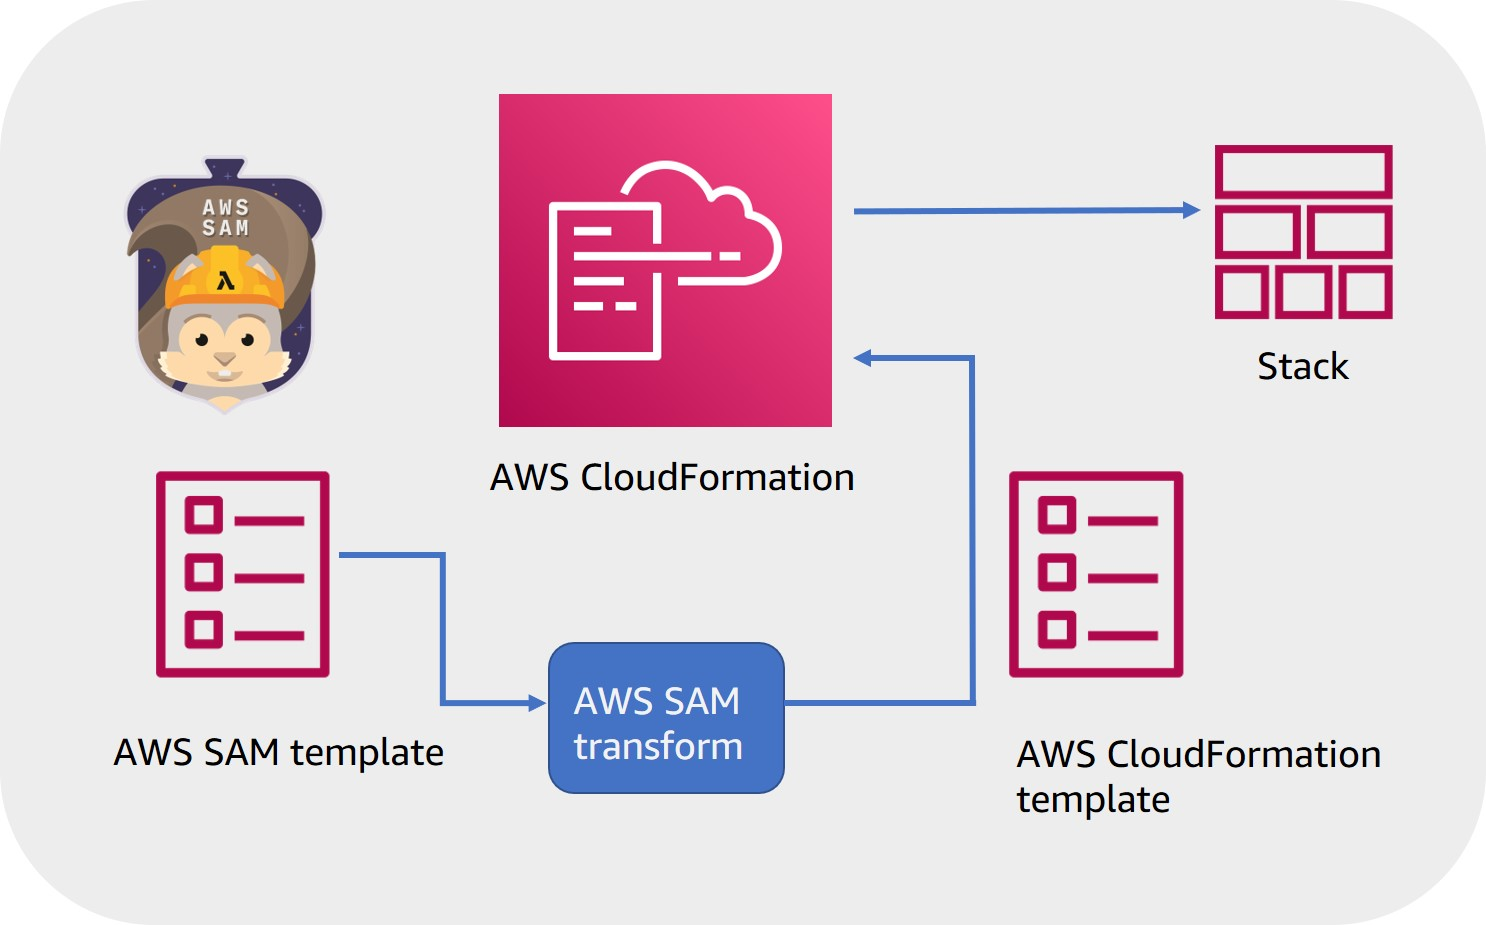


## AWS SAM prebuilt policies

AWS SAM provides a number of predefined, commonly used templates that you can use to build for least privilege security access. The list of policy templates scope the permissions of your Lambda functions to only the resources used by your application. These policies require minimal input to run and can save time on developing and deploying.

## Example: AWS SAM template 
The following images explore and explain each line in an AWS SAM template example.

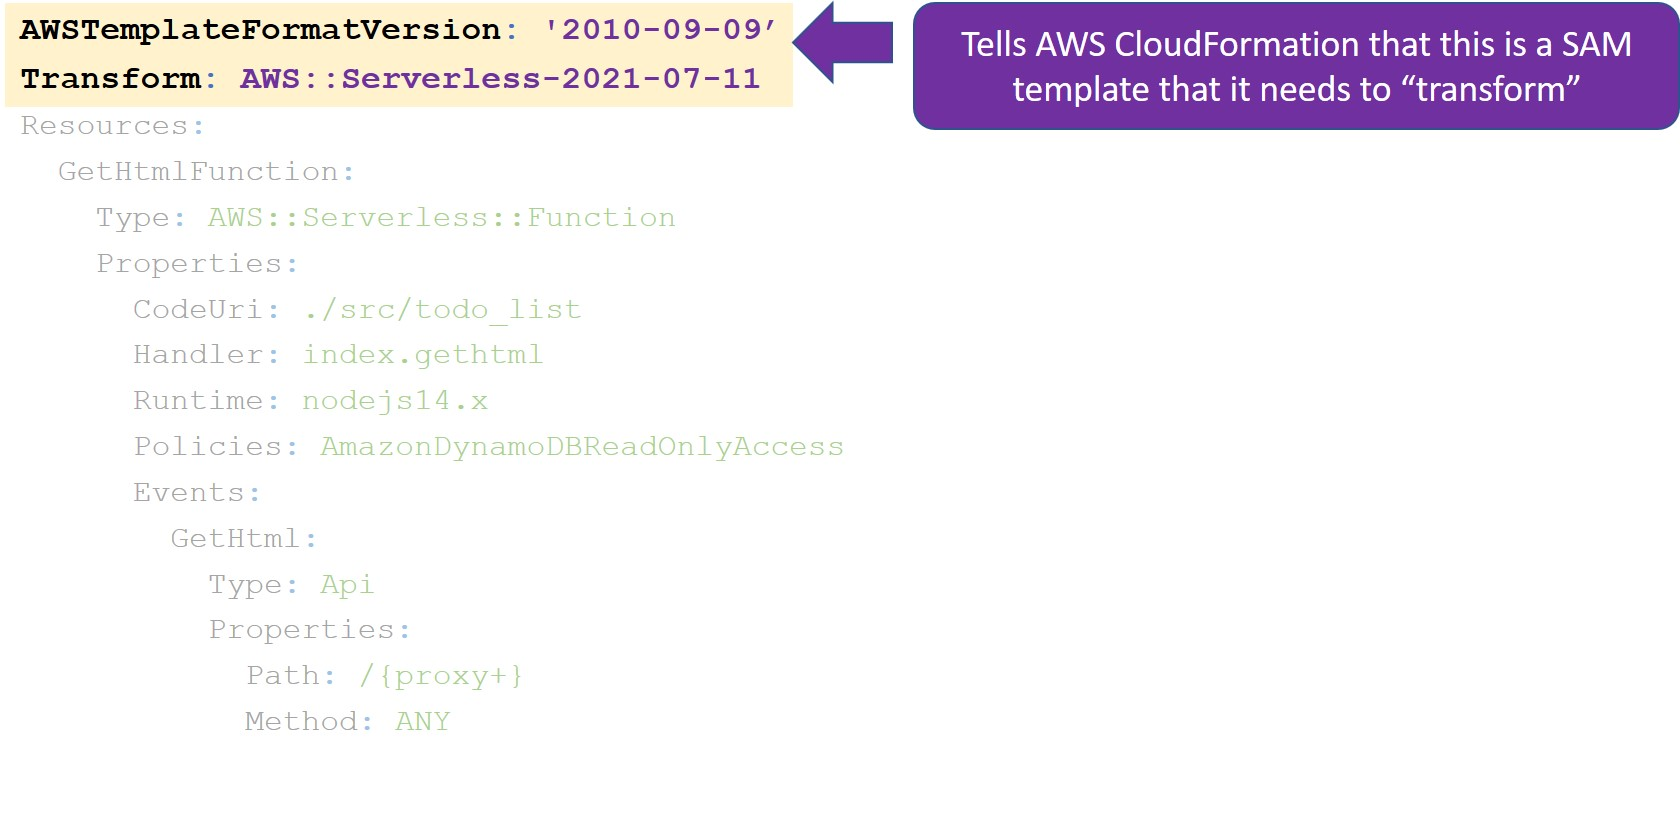

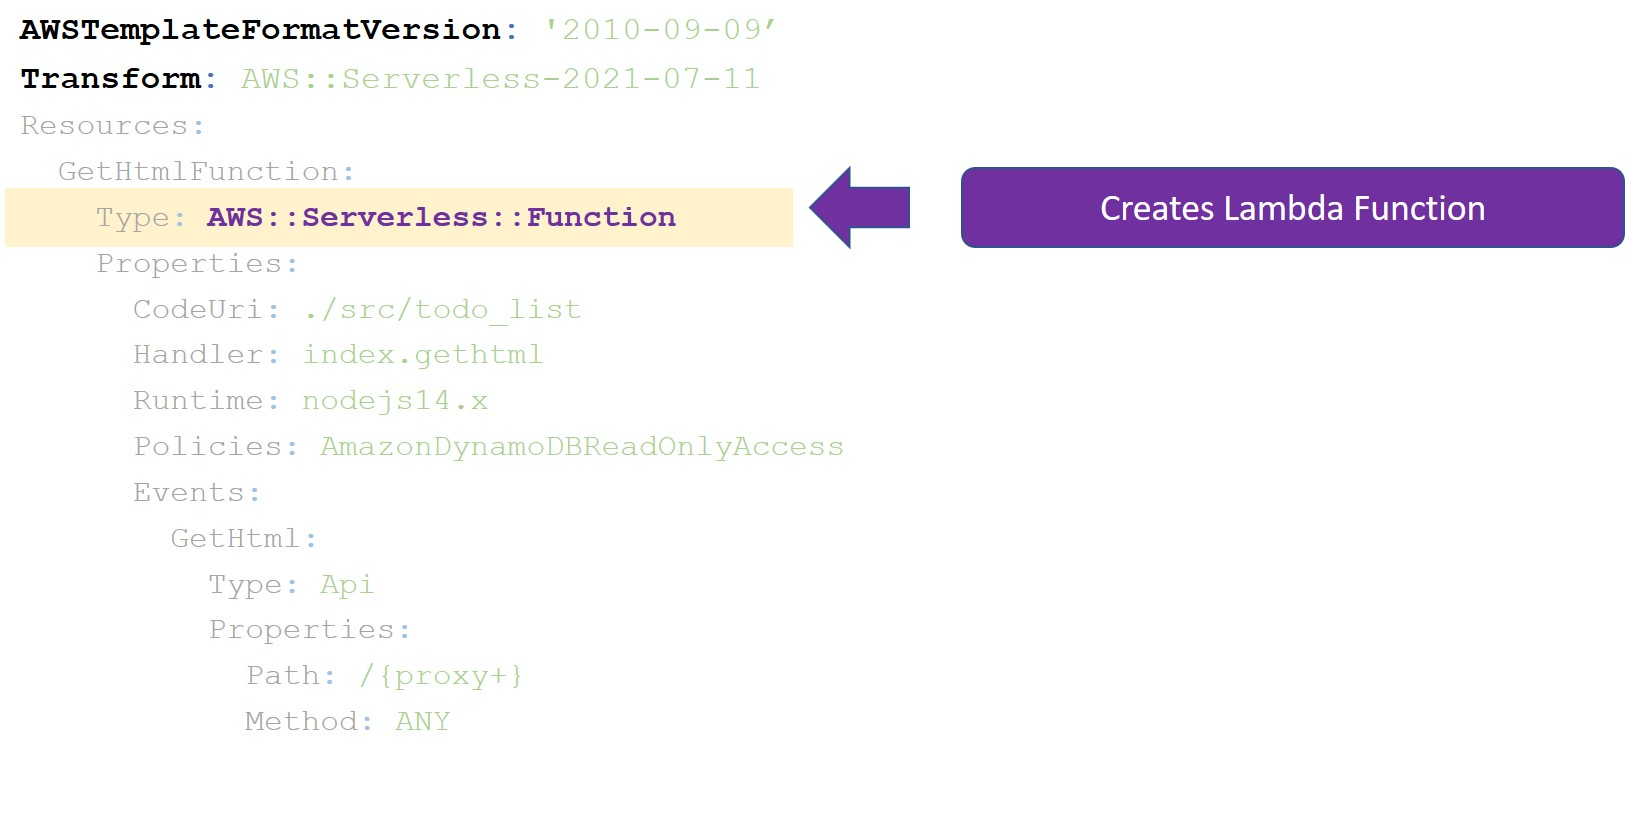

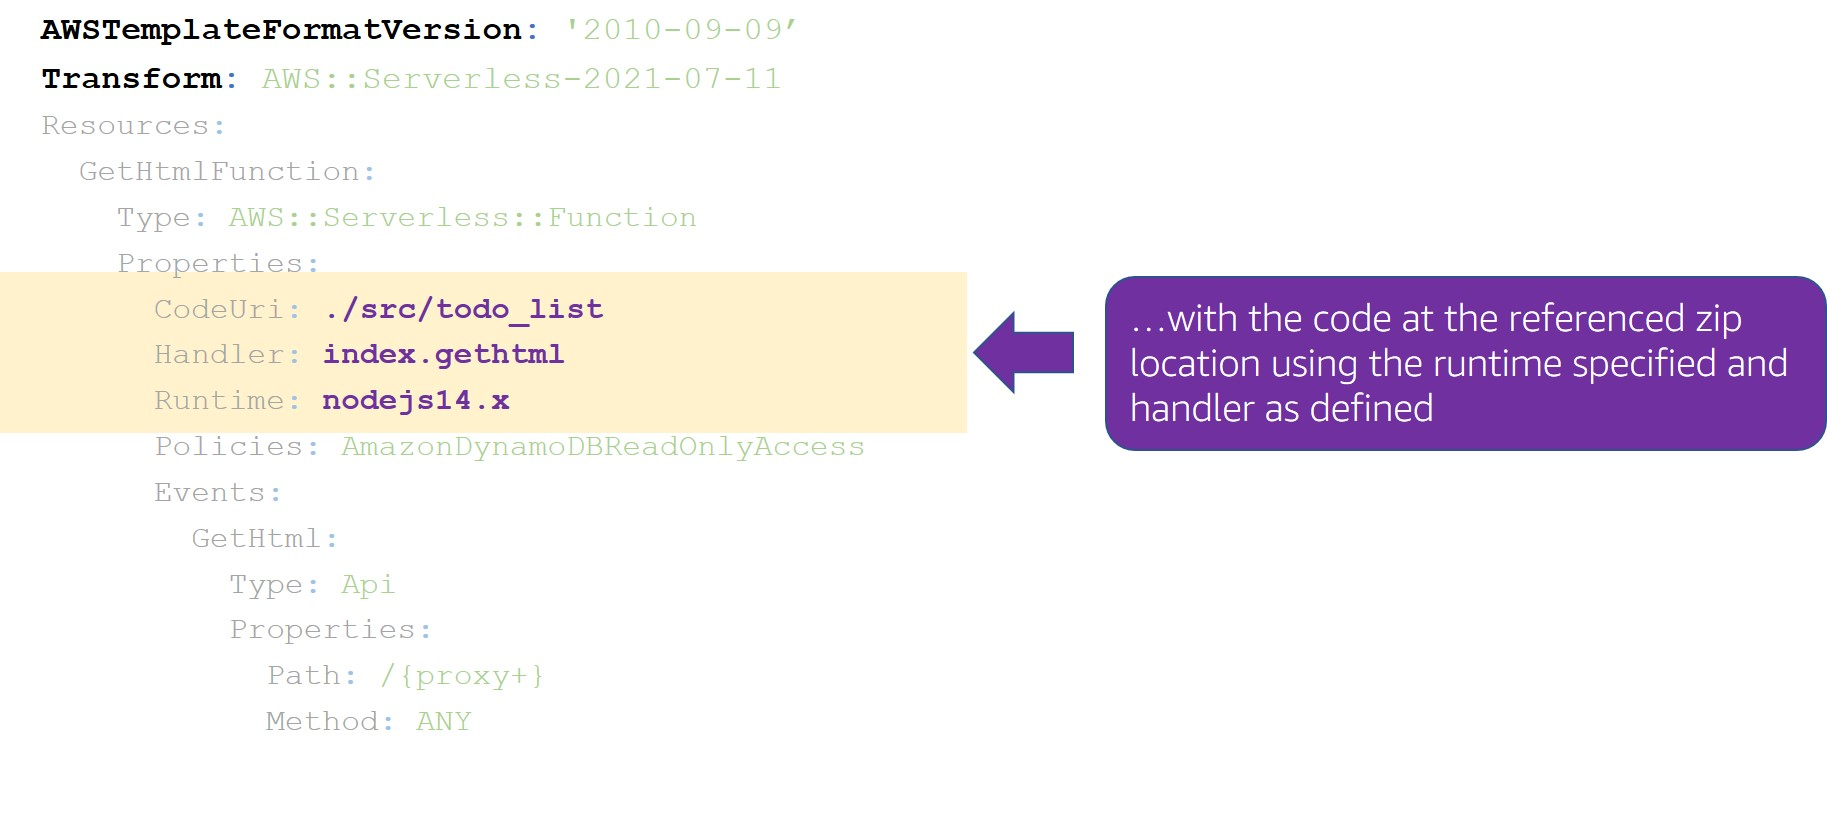

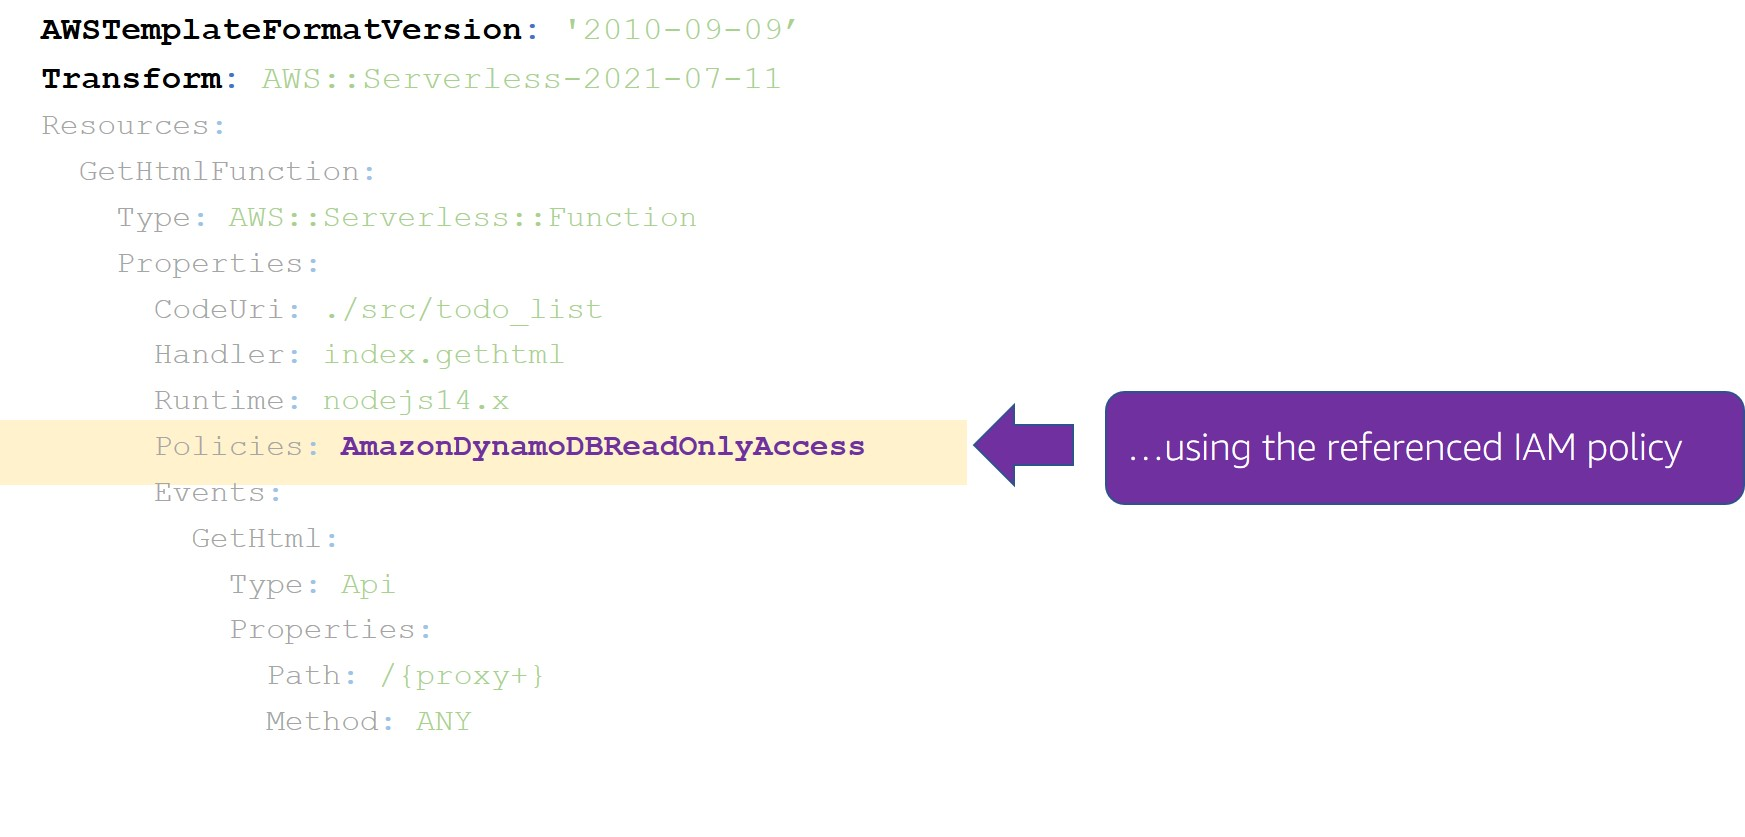

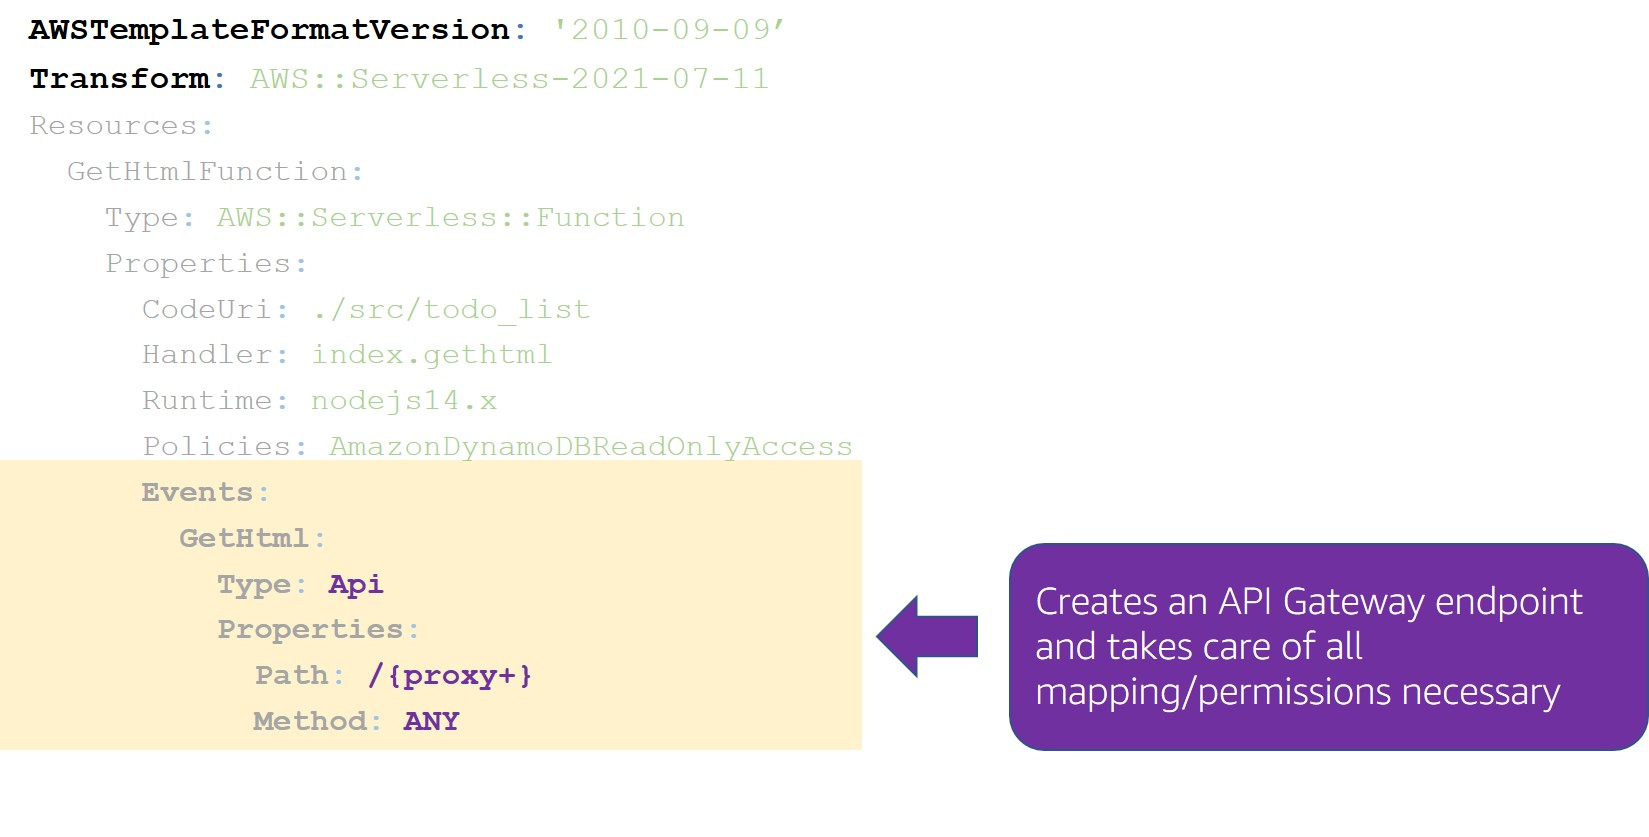

## AWS SAM CLI helps you test and deploy

AWS SAM CLI launches a Docker container that you can interact with to test and debug your Lambda functions. Note that even with a tool like AWS SAM CLI, local testing will only cover a subset of what must be tested before code should go into your production application.

### AWS SAM CLI for testing

With AWS SAM CLI for testing, you can do the following:

- Invoke functions and run automated tests locally.
- Generate sample event source payloads.
- Run API Gateway locally.
- Debug code.
- Review Lambda function logs.
- Validate AWS SAM templates.

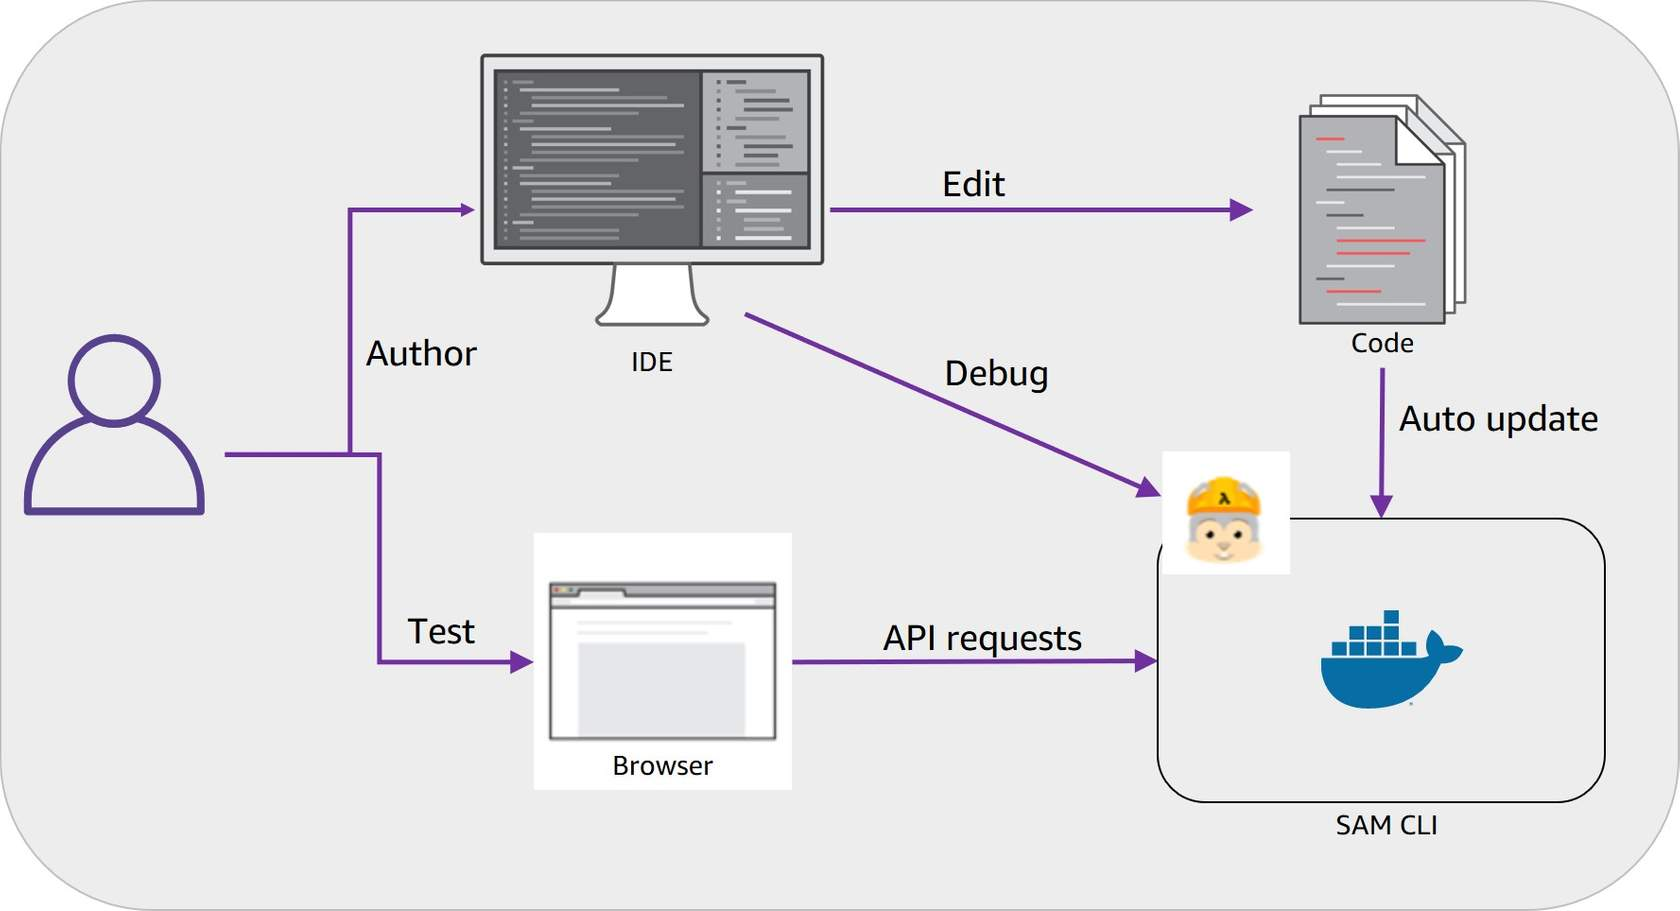

## AWS SAM CLI

You can install the AWS SAM CLI locally to help test your serverless applications, validate your AWS SAM templates, and streamline your deployments.

## init
Initializes a serverless application.

## local
Runs your application locally.

## validate
Validates an AWS SAM template.

## deploy
Deploys an AWS SAM application.



This command comes with a guided interactive mode, which you can enable by specifying the **--guided** parameter. The interactive mode walks you through the parameters required for deployment, provides default options, and saves these options in a configuration file in your project folder. You can initiate subsequent deployments of your application using the sam deploy command. The required parameters will be retrieved from the AWS SAM CLI configuration file.



Deploying Lambda functions through AWS CloudFormation requires an Amazon S3 bucket for the Lambda deployment package. The SAM CLI creates and manages this Amazon S3 bucket for you.

## build
Builds a serverless application and prepares it for subsequent steps in your workflow. 

The **sam build** command processes your AWS SAM template file, application code, and any applicable language-specific files and dependencies. This command also copies build artifacts in the format and location expected for subsequent steps in your workflow. 

## Serverless CI/CD pipeline
You can incorporate additional tools to create an automated CI/CD pipeline for your serverless applications that integrate with AWS SAM. 

CodeBuild – Automate the process of packaging code and running tests before the code is deployed.
CodeDeploy – Use version management options to ensure safe deployments to production.

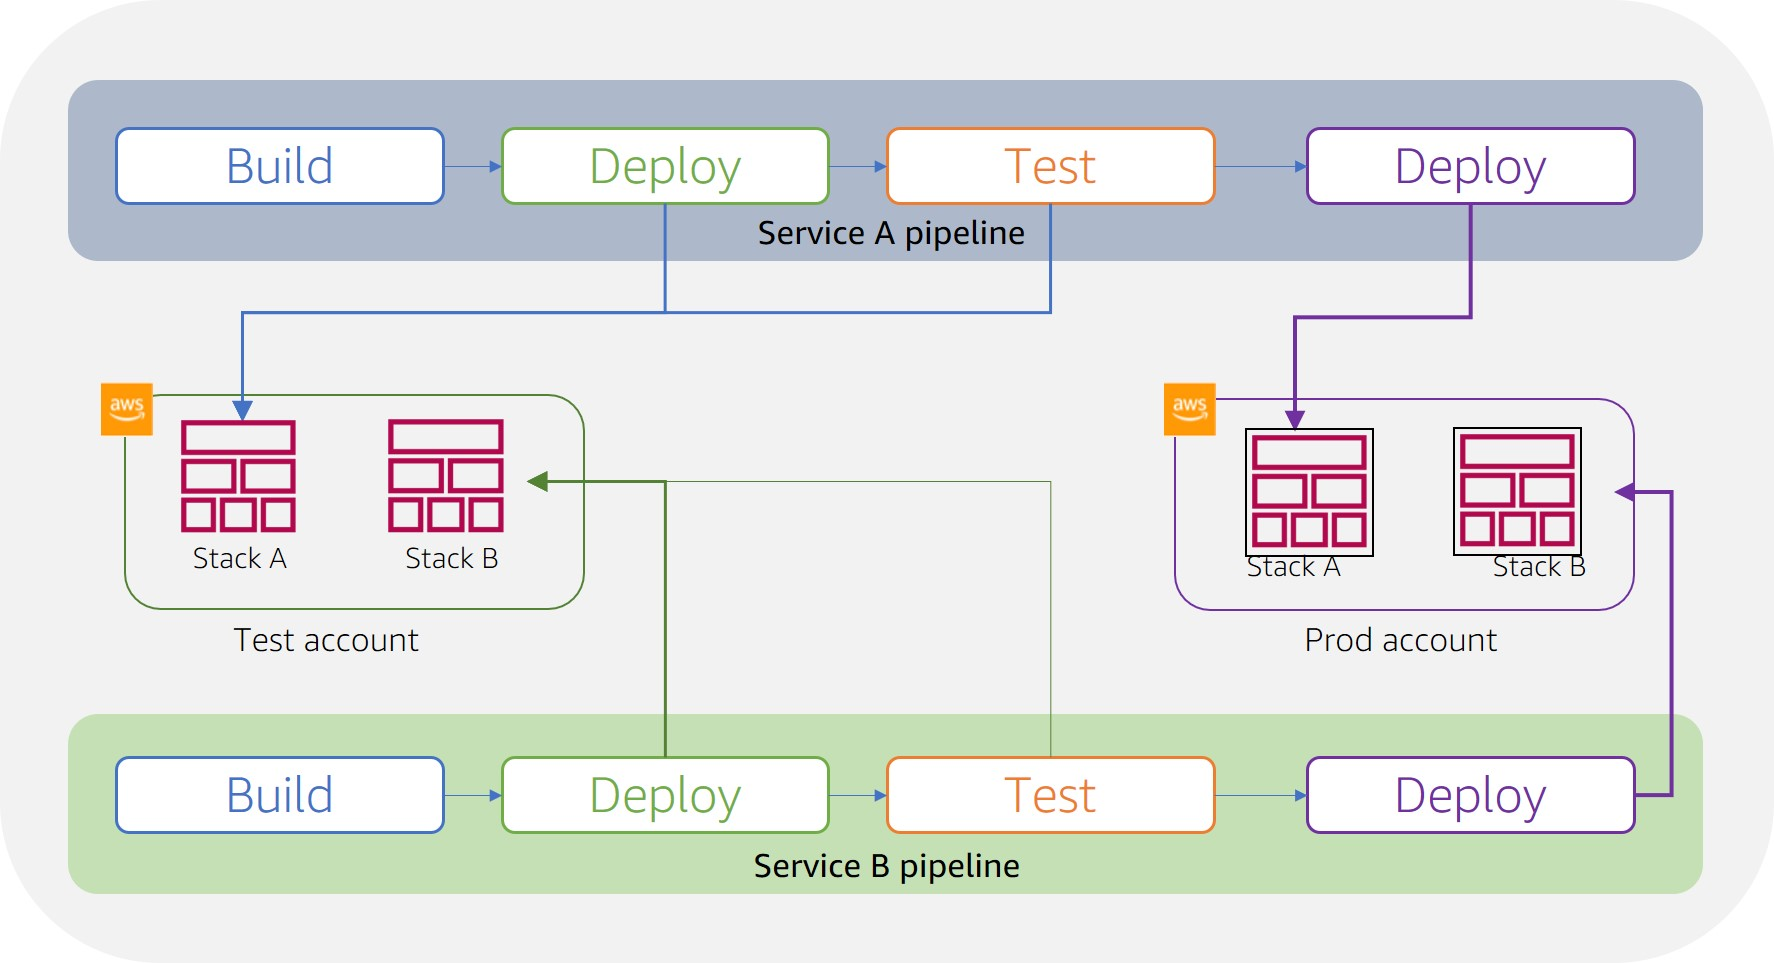